# Medical Imaging
### Lab 5
### 05 June 2022

Consider the study of a homogenous sample with T1/T2 = 600/60 ms, using a spin-echo NMR sequence, with TE/TR = 15/150 ms, and 90° excitation along +y. In the simulations, use the rotating reference frame and a time step of 0.5 ms, and assume instantaneous excitations.

First consider on-resonance spins (Δω = 0 Hz):

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
delT = 0.5 / 1000
T1 = 600 / 1000
T2 = 60 / 1000 
TE = 15 / 1000
TR = 150 / 1000
g = 42.58 * (10**6)

In [4]:
def excitation(direction, t, gyr, theta, M_0, delOmega):
    if theta is not None:     
        theta = np.deg2rad(theta)
        B_1 = theta / (gyr * t)
        phi = gyr*B_1*delT
    elif delOmega is not None:
        phi = delOmega*delT
        
    if direction == "x":
        rotMat = [[1, 0, 0], [0, np.cos(phi), np.sin(phi)], [0, -np.sin(phi), np.cos(phi)]]
    if direction == "y":
        rotMat = [[np.cos(phi), 0, -np.sin(phi)], [0, 1, 0], [np.sin(phi), 0, np.cos(phi)]]
    if direction == "z":
        rotMat = [[np.cos(phi), np.sin(phi), 0], [-np.sin(phi), np.cos(phi), 0], [0, 0, 1]]
    
    m = M_0
    mX = [M_0[0]]
    mY = [M_0[1]]
    mZ = [M_0[2]]
    
    for i in range(1, int(t/delT)):
        m = np.matmul(rotMat, m)
        
        mX = np.append(mX, m[0])
        mY = np.append(mY, m[1])
        mZ = np.append(mZ, m[2])
        
    return [mX, mY, mZ]  

In [5]:
def relaxation(t, T_1, T_2, M_0):
    m = M_0
    mX = [M_0[0]]
    mY = [M_0[1]]
    mZ = [M_0[2]]
    
    for j in range(1, int(t / delT)):
        relaxMat = [[np.exp(-(delT / T_2)), 0 , 0], [0, np.exp(-(delT / T_2)), 0], [0, 0, np.exp(-(delT / T_1))]]
        m = np.matmul(relaxMat, m) + [0, 0, (np.linalg.norm(M_0)*(1 - np.exp(-delT / T_1)))]
        
        mX = np.append(mX, m[0])
        mY = np.append(mY, m[1])
        mZ = np.append(mZ, m[2])
        
    return [mX, mY, mZ]         

#### 1. Simulate the evolution of the magnetization during one TR and plot each magnetization component as a function of time.

[-0.9986295347545726, 0.0, 0.052335956242943585]


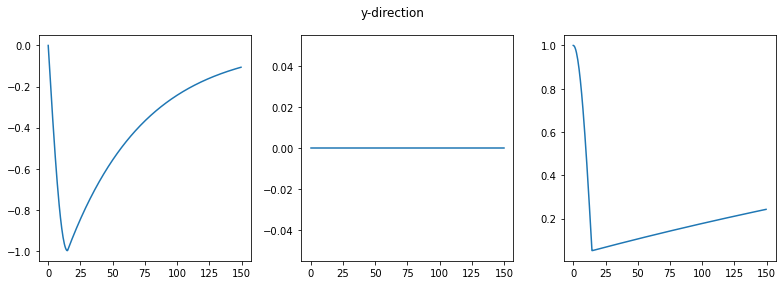

In [6]:
M_0 = [0, 0, 1]
direction = "y"

mExcitedX, mExcitedY, mExcitedZ = excitation(direction, TE, g, 90, M_0, None)
mExcited = [mExcitedX[-1], mExcitedY[-1], mExcitedZ[-1]]
mRelaxedX, mRelaxedY, mRelaxedZ = relaxation(TR - TE, T1, T2, mExcited)

print(mExcited)

mFinalX = np.concatenate((mExcitedX, mRelaxedX))
mFinalY = np.concatenate((mExcitedY, mRelaxedY))
mFinalZ = np.concatenate((mExcitedZ, mRelaxedZ))

plt.figure(direction, figsize=(11, 4))
plt.suptitle(direction + "-direction")

plt.subplot(1, 3, 1)
plt.plot(np.arange(0, TR*1000, delT*1000), mFinalX)

plt.subplot(1, 3, 2)
plt.plot(np.arange(0, TR*1000, delT*1000), mFinalY)

plt.subplot(1, 3, 3)
plt.plot(np.arange(0, TR*1000, delT*1000), mFinalZ)

plt.tight_layout()

#### 2. Compute the complex transverse magnetization, and plot its amplitude and phase as a function of time.

In [7]:
mXYAmplitude = np.sqrt(mFinalX**2 + mFinalY**2)
np.seterr(invalid='ignore')
mPhase = np.arctan(mFinalY / mFinalX)

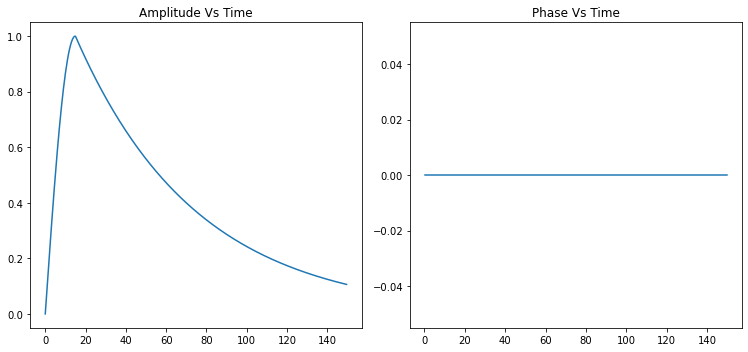

In [8]:
plt.figure("Complex Transverse Magnetization", figsize=(10.5, 5))
plt.title("Complex Transverse Magnetization")

plt.subplot(1, 2, 1)
plt.title("Amplitude Vs Time")
plt.plot(np.arange(0, TR*1000, delT*1000), mXYAmplitude)

plt.subplot(1, 2, 2)
plt.title("Phase Vs Time")
plt.plot(np.arange(0, TR*1000, delT*1000), mPhase)

plt.tight_layout()

#### Now consider an ensemble of off-resonance spins with Δω between -50 and +50 Hz, in steps of 1 Hz:
#### 3. Repeat 1. and 2.; for the plots, consider the average magnetization of all spins.

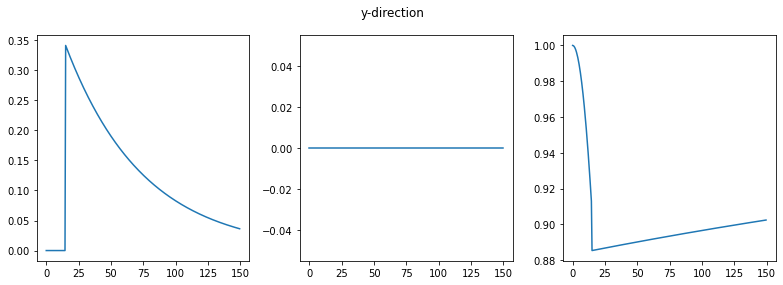

In [9]:
M_0 = [0, 0, 1]
direction = "y"
i = 0

mAvgExcitedX = 0;
mAvgExcitedY = 0;
mAvgExcitedZ = 0;
mAvgRelaxedX = 0;
mAvgRelaxedY = 0;
mAvgRelaxedZ = 0;

for angle in range(-50, 51):
    
    mExcitedX, mExcitedY, mExcitedZ = excitation(direction, TE, g, None, M_0, angle)
    
    mAvgExcitedX = (mAvgExcitedX*i + mExcitedX) / (i + 1)
    mAvgExcitedY = (mAvgExcitedY*i + mExcitedY) / (i + 1)
    mAvgExcitedZ = (mAvgExcitedZ*i + mExcitedZ) / (i + 1)
    
    mExcited = [mAvgExcitedX[-1], mAvgExcitedY[-1], mAvgExcitedZ[-1]]
    mRelaxedX, mRelaxedY, mRelaxedZ = relaxation(TR - TE, T1, T2, mExcited)
    
    mAvgRelaxedX = (mAvgRelaxedX*i + mRelaxedX) / (i + 1)
    mAvgRelaxedY = (mAvgRelaxedY*i + mRelaxedY) / (i + 1)
    mAvgRelaxedZ = (mAvgRelaxedZ*i + mRelaxedZ) / (i + 1)

    i += 1
    
mFinalX = np.concatenate((mAvgExcitedX, mAvgRelaxedX))
mFinalY = np.concatenate((mAvgExcitedY, mAvgRelaxedY))
mFinalZ = np.concatenate((mAvgExcitedZ, mAvgRelaxedZ))

plt.figure(direction, figsize=(11, 4))
plt.suptitle(direction + "-direction")

plt.subplot(1, 3, 1)
plt.plot(np.arange(0, TR*1000, delT*1000), mFinalX)

plt.subplot(1, 3, 2)
plt.plot(np.arange(0, TR*1000, delT*1000), mFinalY)

plt.subplot(1, 3, 3)
plt.plot(np.arange(0, TR*1000, delT*1000), mFinalZ)

plt.tight_layout()

#### 4. Repeat 3. for a multiple spin-echo experiment with 6 echoes and determine the T2 of the sample using the data measured in this experiment

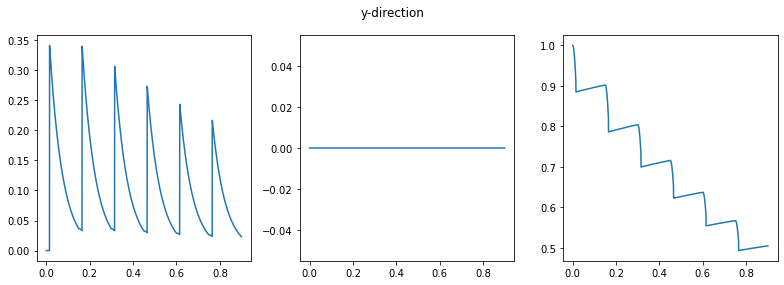

In [11]:
mFinalX = np.array([])
mFinalY = np.array([])
mFinalZ = np.array([])
M_0 = [0, 0, 1]

for repeat in range(0, 6):
    direction = "y"
    i = 0

    mAvgExcitedX = 0;
    mAvgExcitedY = 0;
    mAvgExcitedZ = 0;
    mAvgRelaxedX = 0;
    mAvgRelaxedY = 0;
    mAvgRelaxedZ = 0;
    for angle in range(-50, 51):

        mExcitedX, mExcitedY, mExcitedZ = excitation(direction, TE, g, None, M_0, angle)

        mAvgExcitedX = (mAvgExcitedX*i + mExcitedX) / (i + 1)
        mAvgExcitedY = (mAvgExcitedY*i + mExcitedY) / (i + 1)
        mAvgExcitedZ = (mAvgExcitedZ*i + mExcitedZ) / (i + 1)

        mExcited = [mAvgExcitedX[-1], mAvgExcitedY[-1], mAvgExcitedZ[-1]]
        
        mRelaxedX, mRelaxedY, mRelaxedZ = relaxation(TR - TE, T1, T2, mExcited)

        mAvgRelaxedX = (mAvgRelaxedX*i + mRelaxedX) / (i + 1)
        mAvgRelaxedY = (mAvgRelaxedY*i + mRelaxedY) / (i + 1)
        mAvgRelaxedZ = (mAvgRelaxedZ*i + mRelaxedZ) / (i + 1)

        i += 1

    M_0 = [mAvgRelaxedX[-1], mAvgRelaxedY[-1], mAvgRelaxedZ[-1]]
    
    mFinalX = np.append(mFinalX, np.concatenate((mAvgExcitedX, mAvgRelaxedX)))
    mFinalY = np.append(mFinalY, np.concatenate((mAvgExcitedY, mAvgRelaxedY)))
    mFinalZ = np.append(mFinalZ, np.concatenate((mAvgExcitedZ, mAvgRelaxedZ)))

plt.figure(direction, figsize=(11, 4))
plt.suptitle(direction + "-direction")

plt.subplot(1, 3, 1)
plt.plot(np.arange(0, 6*TR, delT), mFinalX)

plt.subplot(1, 3, 2)
plt.plot(np.arange(0, 6*TR, delT), mFinalY)

plt.subplot(1, 3, 3)
plt.plot(np.arange(0, 6*TR, delT), mFinalZ)

plt.tight_layout()